# Lab | Customer Analysis Round 6

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataset

In [5]:
data = pd.read_csv('/Users/Hector_Martin/Documents/Labs/linear regression/lab-customer-analysis-round-6/files_for_lab/csv_files/marketing_customer_analysis.csv')
datasafe = data.copy()
datasafe.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Processing Data:

### X-y split:

In [27]:
y = numerical['Total Claim Amount']
X= numerical.drop(['Total Claim Amount'], axis=1)

In [28]:
X_numerical = datasafe.select_dtypes(include=np.number)
X_categorical = datasafe.select_dtypes(include= object)

### SIDE NOTE: I am aware that the Numerical and Categorical and the subsequent normalization and encoding is to be done after the Train - Test split, nonetheless, in order to comply with the structure of this lab I follow the steps as they are.

### Normalize Numerical data:

In [29]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_numerical)
X_normalized = transformer.transform(X_numerical)
print(X_normalized.shape)
X_normalized_df = pd.DataFrame(X_normalized, columns=X_numerical.columns)
display(X_normalized_df)

(9134, 8)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


### One Hot/Label Encoding Categorical variables

In order to do a proper encoding we will have to split the Categorical variables in 2 different groups:
- **Categorical nominal**: We will apply the **One Hot Encoder** method
- **Categorical ordinals**: We will apply the **Ordinal Encoder** method

Let's have a look at the Categorical columns:

In [16]:
#display(X_categorical.head())

We are dropping 2 columns:
- **Customer**: This columns contains just IDs and it will add a lot of noise after having each of its rows dummified
- **Effective To Date**: Not relevant for this exercise.


In [33]:
X_categorical = X_categorical.drop(['Customer', 'Effective To Date'], axis =1)

#### Encoding the Categorical Nominal variables:

In [34]:
#Getting the Categorical Nominal variables in a different DataFrame:

X_cat_nom = X_categorical.drop(['Coverage', 'EmploymentStatus', 'Location Code', 'Vehicle Size'], axis =1)
X_cat_nom.head(10)

,State,Response,Education,Gender,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class
0,Washington,No,Bachelor,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,No,Bachelor,F,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,No,Bachelor,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,California,No,Bachelor,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,Washington,No,Bachelor,M,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car
5,Oregon,Yes,Bachelor,F,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car
6,Oregon,Yes,College,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car
7,Arizona,No,Master,M,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car
8,Oregon,Yes,Bachelor,M,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car
9,Oregon,No,College,F,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car


In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoder.fit(X_cat_nom) 
X_cat_nom_encoded = encoder.transform(X_cat_nom).toarray()
cols = encoder.get_feature_names_out(input_features=X_cat_nom.columns)
X_cat_nom_encoded_df = pd.DataFrame(X_cat_nom_encoded, columns=cols, index = X_cat_nom.index)
display(X_cat_nom_encoded_df.head())

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Gender_M,...,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Encoding the Categorical Ordinal variables:

In [36]:
#Getting the Categorical Ordinal variables in a different DataFrame:

X_cat_ord = categorical.drop(['State', 'Response', 'Education',
       'Gender', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class'],  axis = 1)

display(X_cat_ord.head())

,Coverage,EmploymentStatus,Location Code,Vehicle Size
0,Basic,Employed,Suburban,Medsize
1,Extended,Unemployed,Suburban,Medsize
2,Premium,Employed,Suburban,Medsize
3,Basic,Unemployed,Suburban,Medsize
4,Basic,Employed,Rural,Medsize


In [39]:
#Ordinal Encoding per column:

#Vehicle Size:

mapping = {'Small':0,'Medsize':1, 'Large':2}
X_cat_ord = X_cat_ord.replace({'Vehicle Size': mapping})

#Coverage:

mapping2 = {'Basic':0,'Extended':1, 'Premium':2}
X_cat_ord = X_cat_ord.replace({'Coverage': mapping2})

#Employment Status:

mapping3 = {'Disabled':0,'Unemployed':1, 'Employed':2, 'Medical Leave':3, 'Retired': 4}
X_cat_ord = X_cat_ord.replace({'EmploymentStatus': mapping3})

#Location code:

mapping4 = {'Urban':0,'Suburban':1, 'Rural':2}
X_cat_ord = X_cat_ord.replace({'Location Code': mapping4})

display(X_cat_ord.head())

,Coverage,EmploymentStatus,Location Code,Vehicle Size
0,0,2,1,1
1,1,1,1,1
2,2,2,1,1
3,0,1,1,1
4,0,2,2,1


#### Concatenating Normalized and Encoded DataFrames:

In [42]:
X_treated = pd.concat([x_normalized,X_cat_nom_encoded_df, X_cat_ord], axis =1)
X_treated

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,...,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage,EmploymentStatus,Location Code,Vehicle Size
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,2,1,1
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2,2,1,1
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,1
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,2,0,1
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2,1,1
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2,1,2


#### Checking for NaNs after concatenating:

In [44]:
#X_treated.isna().sum()

## Linear Regression

### Train - Test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_treated, y, test_size=0.2, random_state=42)

#Transforming Numpy Arrays into Dataframes:

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,columns=X.columns)

### Apply Linear Regression model

In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#Fitting the model:
lm.fit(X_train,y_train)

#Storing predictions of Train and Test Set in their respective variables:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

## Model Validation

In [72]:
def reg_performance(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    ME_train = round(np.mean(y_train-y_pred_train),2)
    ME_test  = round(np.mean(y_test-y_pred_test),2)

    MAE_train = round(mean_absolute_error(y_train,y_pred_train),2)
    MAE_test  = round(mean_absolute_error(y_test,y_pred_test),2)

    MSE_train = round(mean_squared_error(y_train,y_pred_train),2)
    MSE_test  = round(mean_squared_error(y_test,y_pred_test),2)

    RMSE_train = round(np.sqrt(MSE_train),2)
    RMSE_test  = round(np.sqrt(MSE_test),2)

    MAPE_train = round(np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.),2)
    MAPE_test  = round(np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.),2)

    R2_train = round(r2_score(y_train,y_pred_train),2)
    R2_test  = round(r2_score(y_test,y_pred_test),2)


    #Creating a DataFrame to show the Error Metrics for both Train and Test Set 
    #on a DataFrame
    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    display(performance)
    
    print('REAL vs PREDICTED PERFORMANCE')
    print('------------------------------')
    #Creating a DataFrame to show differences between predicted and Real values on Train Set:
    df_train = pd.DataFrame()
    df_train['Real_train'] = y_train
    df_train['Pred_train'] = y_pred_train

    #Creating a DataFrame differences between predicted and Real values on Test Set:
    df_test = pd.DataFrame()
    df_test['Real_test'] = y_test
    df_test['Pred_test'] = y_pred_test

    display(df_train.head())
    display(df_test.head())
    
    #Plotting a Scatter Plot combined with a Line Plot to compare the performance of our model
    #for both Train and Test Set
    #Alongside to them there is a plot showing the distribution on both sets for y
    
    return performance, df_train, df_test

In [77]:
def lr_perf_plots(df_train, df_test):

    fig2, ax2 = plt.subplots(2,2, figsize=(16,8))

    sns.scatterplot(y = y_pred_train, x=y_train, ax = ax2[0,0])
    sns.lineplot(data = df_train, x = 'Real_train', y = 'Real_train', color = 'black', ax = ax2[0,0])
    sns.histplot(y_train -y_pred_train, ax = ax2[0,1])

    sns.scatterplot(y = y_pred_test, x=y_test, ax = ax2[1,0])
    sns.lineplot(data = df_test, x = 'Real_test', y = 'Real_test', color = 'black', ax = ax2[1,0])
    sns.histplot(y_test - y_pred_test, ax = ax2[1,1])
    
    plt.show()

In [73]:
linear_reg_performance(y_train, y_pred_train, y_test, y_pred_test)

,Error_metric,Train,Test
0,Mean error,-0.00,-3.23
1,Mean absolute error,128.62,128.97
2,Mean squared error,32035.48,31264.20
3,Root mean squared error,178.98,176.82
4,Mean absolute percentual error,150.60,170.92
5,R2,0.63,0.61


REAL vs PREDICTED PERFORMANCE
------------------------------


,Real_train,Pred_train
5123,223.31,320.82
7738,568.80,515.87
214,355.20,251.40
8580,272.65,241.89
7857,391.97,298.05


,Real_test,Pred_test
708,218.60,307.78
47,447.79,450.32
3995,451.20,294.48
1513,355.64,408.13
3686,470.10,372.71


(                     Error_metric    Train     Test
 0                      Mean error    -0.00    -3.23
 1             Mean absolute error   128.62   128.97
 2              Mean squared error 32035.48 31264.20
 3         Root mean squared error   178.98   176.82
 4  Mean absolute percentual error   150.60   170.92
 5                              R2     0.63     0.61,
       Real_train  Pred_train
 5123      223.31      320.82
 7738      568.80      515.87
 214       355.20      251.40
 8580      272.65      241.89
 7857      391.97      298.05
 ...          ...         ...
 5734      308.32      114.09
 5191      350.40      347.14
 5390     1059.57      810.03
 860       667.20      754.45
 7270      344.02      378.72
 
 [7307 rows x 2 columns],
       Real_test  Pred_test
 708      218.60     307.78
 47       447.79     450.32
 3995     451.20     294.48
 1513     355.64     408.13
 3686     470.10     372.71
 ...         ...        ...
 4855     665.93     418.70
 1880      33.97

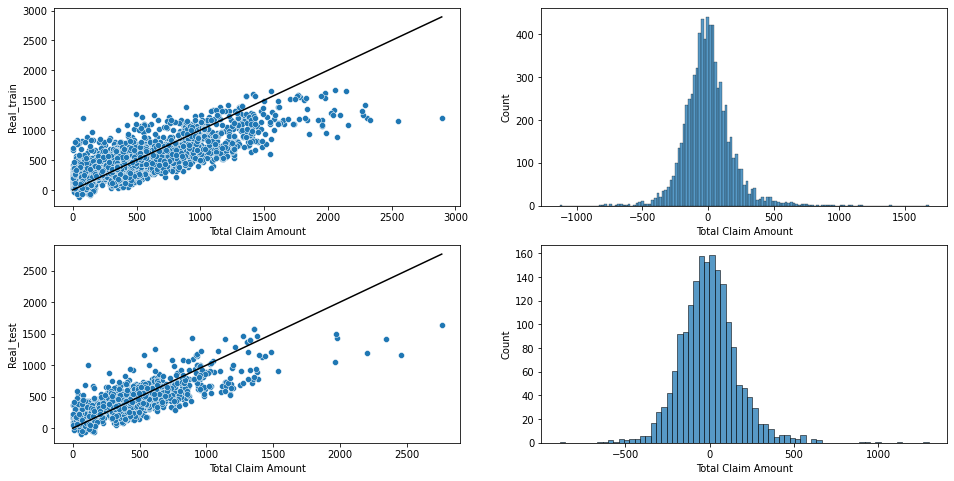

In [78]:
lr_perf_plots(df_train, df_test)